# Prédiction de race de chien par réseau de neurones convolutionnel

In [ ]:
import zipfile
import os

# Chemin vers le fichier ZIP
zip_path = '/content/Images.zip'
extract_dir = '/content/RACES_Chien/'

# Extraire l'archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Archive extraite dans {extract_dir}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Images.zip'

In [ ]:
DIR = "/content/RACES_Chien/Images"
os.listdir(DIR)
os.chdir(DIR)

FileNotFoundError: [Errno 2] No such file or directory: '/content/RACES_Chien/Images'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Data/Deep Learning projet/"
os.listdir(DIR)
os.chdir(DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


On remarque avant toute choses, en faisant une exploration sur les données à notre disposition (dans le détails des fichiers) que les images n'ont pas toutes les mêmes dimensions. De plus parfois ce n'est pas le chien qui est au premier plan de l'image/centré.
On va donc d'abord parcourir l'ensemble des images et faire un resize sur la plus petite taille d'image.
Nous aurons alors quelques dimensions pour les entrées de notre CNN.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread

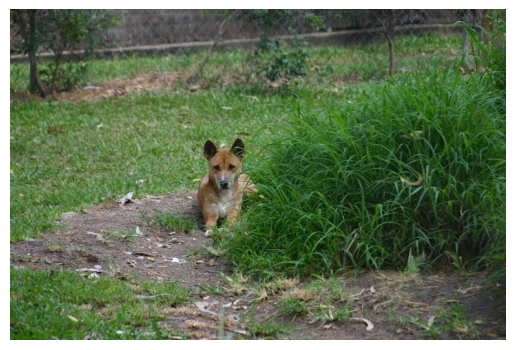

In [7]:
X = []
Y = []
for race in os.listdir():
  for photo in os.listdir(race):
    sample_image = imread(race + "/" + photo).astype("float32") / 255
    X.append(sample_image)
    Y.append(race)
plt.imshow(sample_image)
plt.axis("off")
plt.show()

In [8]:
races = os.listdir()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=17112020)

In [10]:
X_train[0]

array([[[0.58431375, 0.52156866, 0.2784314 ],
        [0.53333336, 0.45490196, 0.20784314],
        [0.57254905, 0.44705883, 0.20784314],
        ...,
        [0.4509804 , 0.4745098 , 0.23921569],
        [0.34117648, 0.3764706 , 0.12941177],
        [0.34901962, 0.38431373, 0.13725491]],

       [[0.54901963, 0.4745098 , 0.20784314],
        [0.43529412, 0.3529412 , 0.09803922],
        [0.59607846, 0.47843137, 0.23529412],
        ...,
        [0.3882353 , 0.40392157, 0.16470589],
        [0.29411766, 0.31764707, 0.06666667],
        [0.5294118 , 0.5529412 , 0.3019608 ]],

       [[0.5686275 , 0.47843137, 0.18039216],
        [0.8039216 , 0.70980394, 0.42745098],
        [0.6784314 , 0.56078434, 0.3254902 ],
        ...,
        [0.15686275, 0.16470589, 0.        ],
        [0.39215687, 0.40392157, 0.14117648],
        [0.50980395, 0.52156866, 0.2509804 ]],

       ...,

       [[0.75686276, 0.62352943, 0.34117648],
        [0.65882355, 0.5254902 , 0.24313726],
        [0.57254905, 0

In [11]:
len(Y_train)

702

In [12]:
len(Y)

936

In [13]:
width=10000
height=10000
for image in X:
  width = min(width,image.shape[0])
  height = min(height,image.shape[1])

In [14]:
width

124

In [15]:
height

133

(array([305., 620.,   8.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 124. ,  356.4,  588.8,  821.2, 1053.6, 1286. , 1518.4, 1750.8,
        1983.2, 2215.6, 2448. ]),
 <BarContainer object of 10 artists>)

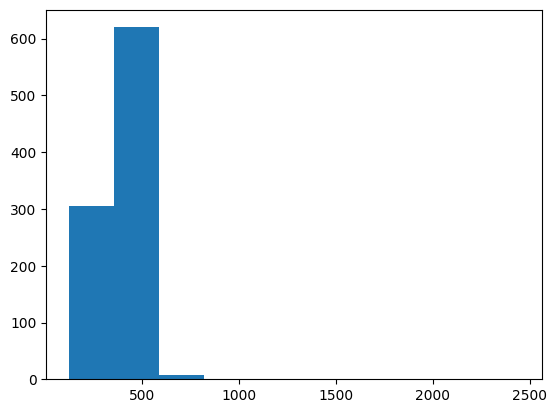

In [16]:
widths = []
heigths = []
for image in X:
  widths.append(image.shape[0])
  heigths.append(image.shape[1])

plt.hist(widths)

(array([258., 669.,   7.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 133. ,  446.1,  759.2, 1072.3, 1385.4, 1698.5, 2011.6, 2324.7,
        2637.8, 2950.9, 3264. ]),
 <BarContainer object of 10 artists>)

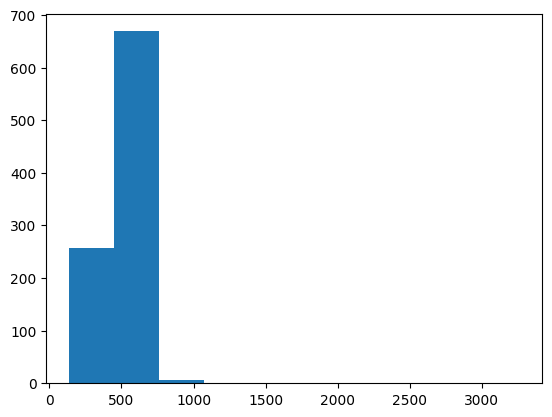

In [17]:
plt.hist(heigths)

In [18]:
np.mean(widths)

382.7713675213675

In [19]:
np.mean(heigths)

463.6442307692308

In [20]:
np.median(widths)

375.0

In [21]:
np.median(heigths)

500.0

On va choisir la valeur médiane pour notre resize, de ce fait on aura une image qui ressemble sachant qu'il y a peu de valeurs extrémement grandes (ou extremement petites), cela parait plus cohérent que la moyenne.

In [22]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras import layers
from keras import models

## Premier modèle (modèle "from scratch")

In [23]:
tf.random.set_seed(17112020) #On fixe la graine pour intérpréter les résultats

model = models.Sequential()

model.add(layers.Conv2D(32,(3, 3),activation="relu", input_shape=(375,500,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 373, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 186, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 184, 247, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 92, 123, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 121, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 45, 60, 128)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 373, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 186, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 184, 247, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 92, 123, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 121, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 45, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 345600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,118,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,212,037 (84.73 MB)

 Trainable params: 22,212,037 (84.73 MB)

 Non-trainable params: 0 (0.00 B)

On prépare les données pour l'apprentissage et la validation.

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
Y_train_reshaped = np.array(Y_train).reshape(-1, 1)
Y_train_encoded = encoder.fit_transform(Y_train_reshaped)

In [28]:
X_train_resized = []
for img in X_train:
    resized_img = tf.image.resize(img, (375, 500)).numpy()
    X_train_resized.append(resized_img)

X_train = np.array(X_train_resized)
optim = "adam"
model.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
history_m = model.fit(X_train,Y_train_encoded,batch_size=32,epochs=20)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 674ms/step - accuracy: 0.1920 - loss: 3.0385
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.2219 - loss: 1.6202
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.3192 - loss: 1.5203
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.4657 - loss: 1.2808
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.5571 - loss: 1.1189
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.7042 - loss: 0.8386
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.7826 - loss: 0.6266
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.8637 - loss: 0.3907
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9212 - loss: 0.3533
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9002 - loss: 0.3619
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9665 - loss: 0.1286
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/ste

In [29]:
Y_test_reshaped = np.array(Y_test).reshape(-1, 1)
Y_test_encoded = encoder.fit_transform(Y_test_reshaped)
X_test_resized = []
for img in X_test:
    resized_img = tf.image.resize(img, (375, 500)).numpy()
    X_test_resized.append(resized_img)

X_test = np.array(X_test_resized)
model.evaluate(X_test,Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 391ms/step - accuracy: 0.3759 - loss: 6.1115


[6.875438690185547, 0.3632478713989258]

On remarque que sur l'apprentissage on a une accuracy de 100% avec une loss très faible toutefois lorsqu'on vérifie l'accuracy sur les données de test est plus faible (ce n'est pas très satisfaisant). On repère donc ici un surapprentissage du modèle.

In [30]:
model.save(DIR+"model_race_base_no_aug.keras") #Pour sauvegarde du modèle

Notre premier modèle et relativement satisfaisant (pour un modèle from scratch), (plus de 30% d'accuracy) on va maintenant comparer ce modèle à un modèle qui aurait été entrainé avec de la data augmentation.

In [31]:
#Code généré par une intelligence artificielle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest'
    ) #On remarque que chaque option défini les transformations possibles sur
    #Nos images originales (rotation, translation, shear ?, zoom, effet miroir)

On va ensuite recréer un nouveau modèle (exactement le même que précédemment mais qui sera entrainé lui avec la data augmentation).

In [32]:
model_data_aug = models.Sequential()

model_data_aug.add(layers.Conv2D(32,(3, 3),activation="relu", input_shape=(375,500,3)))
model_data_aug.add(layers.MaxPooling2D((2, 2)))
model_data_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_data_aug.add(layers.MaxPooling2D((2, 2)))
model_data_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_data_aug.add(layers.MaxPooling2D((2, 2)))
model_data_aug.add(layers.Flatten())
model_data_aug.add(layers.Dense(64, activation='relu'))
model_data_aug.add(layers.Dense(5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
train_generator = datagen.flow(X_train, Y_train_encoded, batch_size = 32)
model_data_aug.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
history_m_data_augmented = model_data_aug.fit(train_generator,
                                              epochs = 20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2108 - loss: 3.8967
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2709 - loss: 1.5653
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3463 - loss: 1.5240
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3443 - loss: 1.4776
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3575 - loss: 1.4423
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3822 - loss: 1.3966
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3827 - loss: 1.4427
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3671 - loss: 1.4313
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3688 - loss: 1.4518
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3790 - loss: 1.3921
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4084 - loss: 1.3844
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4426 - lo

In [34]:
model_data_aug.evaluate(X_test,Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.4183 - loss: 1.3468


[1.3597725629806519, 0.4145299196243286]

In [35]:
model_data_aug.save(DIR+"model_race_base_aug.keras")

Ce dernier modèle est plus précis (meilleur accuracy et loss plus faible). On voit que la data augmentation a amélioré le modèle. C'est normal car si on regarde les images que l'on a dans le jeu de données elles sont très variées. On a également réduit le surapprentissage (c'est normal on a virtuellement augmenté la taille du jeu de données d'apprentissage).

## Second type de modèle, avec un modèle de base (Transfer Learning)

A l'aide d'un petit prompt à l'intelligence artificielle, je me suis documenté sur les modèles pré entrainés. VGG16 et VGG19 seraient de gros modèles assez ancien, il me suggère MobileNetV2, j'ai réalisé quelques tentatives avec ce modèle et il semblerait que le mieux ne soit pas de faire une couche flatten (perte d'information sur la position) mais plutôt une couche d'average pooling juste après le modèle de base. (C'est d'ailleurs ce qui est utilisé dans le modèle de base si on met include_top sur True)

In [36]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(375,500,3))
base_model.trainable = False

base_model.summary()
#Signifie on ne va entrainer que les dix derniers layers du model convolutionnel

<ipython-input-36-008d794a76db>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(375,500,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 375, 500, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 188, 250, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 188, 250, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 188, 250, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 188, 250, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 188, 250, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 188, 250, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 188, 250, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 188, 250, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 188, 250, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 188, 250, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 188, 250, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 189, 251, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 94, 125, 96)    │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [37]:
model_transf = models.Sequential()
model_transf.add(base_model)
model_transf.add(layers.GlobalAveragePooling2D())
model_transf.add(layers.Dense(256, activation='relu'))
model_transf.add(layers.Dense(5, activation='softmax'))

model_transf.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 12, 16, 1280)        │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [38]:
from tensorflow.keras.optimizers import RMSprop
optim = RMSprop(learning_rate=0.001)

model_transf.compile(optimizer = optim,
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])
history_m_transf = model_transf.fit(X_train,Y_train_encoded,batch_size=16,epochs=20)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.6129 - loss: 1.0032
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9566 - loss: 0.1412
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9785 - loss: 0.0699
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9890 - loss: 0.0342
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9937 - loss: 0.0218
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9948 - loss: 0.0149
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9882 - loss: 0.0537
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9987 - loss: 0.0063
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 1.0000 - loss: 5.6007e-04
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - acc

In [39]:
model_transf.evaluate(X_test, Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 770ms/step - accuracy: 0.9855 - loss: 0.0823


[0.08053183555603027, 0.9829059839248657]

L'accuracy très élevée en entrainement pourrait laisser penser à un surapprentissage mais en réalité le score en test est également très bon. Ce modèle a su capter toutes les spécificités des races de chiens et le modèle de base a de très bon poids et un très bonne structure pour ce jeu de données.

In [40]:
model_transf.save(DIR+"model_race_transf_no_aug.keras")

In [41]:
model_transf_data_aug = models.Sequential()
model_transf_data_aug.add(base_model)
model_transf_data_aug.add(layers.GlobalAveragePooling2D())
model_transf_data_aug.add(layers.Dense(256, activation='relu'))
model_transf_data_aug.add(layers.Dense(5, activation='softmax'))

In [42]:
from tensorflow.keras.optimizers import RMSprop
optim = RMSprop(learning_rate=0.001)

train_generator = datagen.flow(X_train, Y_train_encoded, batch_size = 32)
model_transf_data_aug.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
history_m_transf_data_augmented = model_transf_data_aug.fit(train_generator,
                                              epochs = 10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5477 - loss: 1.2504
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8219 - loss: 0.4492
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9210 - loss: 0.2572
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9654 - loss: 0.1329
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9521 - loss: 0.1443
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9499 - loss: 0.1367
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9398 - loss: 0.1581
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9446 - loss: 0.1498
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9572 - loss: 0.1040
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9453 - loss: 0.1456


In [43]:
model_transf_data_aug.evaluate(X_test,Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.9764 - loss: 0.0616


[0.06740396469831467, 0.9786324501037598]

On voit que la data augmentation n'apporte pas grand chose, le modèle est déjà très bon donc difficile de faire mieux. toutefois on notera que l'accuracy est similaire et la loss plus faible. On a également un risque amoindri de surapprentissage par data augmentation, comme vu précédemment.

In [44]:
model_transf_data_aug.save(DIR+"model_race_transf_aug.keras")

In [45]:
import gc
gc.collect()

2092

In [46]:
from tensorflow.keras.optimizers import Adam

# Charger le 2éme modèle de base (pré-entraîné)
base_model1 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(375,500,3))


# Congeler toutes les couches du modèle de base
base_model1.trainable = False


# Créer le modèle en ajoutant de nouvelles couches
model_transf1 = models.Sequential([
    base_model1,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model_transf1.summary()

# Compiler le modèle pour l'entraînement initial
model_transf1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_generator = datagen.flow(X_train, Y_train_encoded, batch_size = 32)

# Entraîner le modèle avec augmentation des données
history_model_transf1 = model_transf1.fit(
    train_generator,
    epochs=20
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 12, 16, 2048)        │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,691,013 (98.00 MB)

 Trainable params: 2,103,301 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.1682 - loss: 3.4241
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2292 - loss: 1.9441
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2271 - loss: 1.6751
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2148 - loss: 1.6329
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2230 - loss: 1.6216
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2302 - loss: 1.6054
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2716 - loss: 1.6013
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.1912 - loss: 1.6041
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2234 - loss: 1.5947
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2442 - loss: 1.5921
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2317 - loss: 1.6045
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2644 - lo

In [47]:
model_transf1.evaluate(X_test, Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.2635 - loss: 1.5872


[1.5937957763671875, 0.21794871985912323]

Le modèle ne semble pas converger, faible accuracy, loss qui stagne. On ne va pas le retenir il relève davantage de l'aléatoire qu'autre chose.

## Fine-Tuning du modèle

In [48]:
# Après l'entraînement initial, déverrouiller les dernières couches du modèle de base pour le fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

model_transf_fine_tune = model_transf
# Recompiler le modèle pour le fine-tuning avec un faible taux d'apprentissage
model_transf_fine_tune.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continuer l'entraînement avec fine-tuning
history_fine_tuning = model_transf_fine_tune.fit(
    train_generator,
    epochs=20
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9639 - loss: 0.2023
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9829 - loss: 0.0769
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9637 - loss: 0.1510
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9723 - loss: 0.1178
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9528 - loss: 0.2053
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9712 - loss: 0.1064
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9685 - loss: 0.1032
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9651 - loss: 0.1280
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9761 - loss: 0.0746
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9796 - loss: 0.0674
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9847 - loss: 0.0360
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9795 - lo

In [49]:
model_transf_fine_tune.evaluate(X_test, Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - accuracy: 0.9819 - loss: 0.0770


[0.07534857839345932, 0.9786324501037598]

Le fine tuning n'apporte pas non plus grand chose à ce modèle déjà très bon (voir même le fait de modifier les poids d'origine peut empirer le modèle, a voir si on choisit certaines couches ou non.) Le problème ici c'est que le modèle peut avoir appris sur des images semblable on peut donc difficilement améliorer le modèle.

In [51]:
# Après l'entraînement initial, déverrouiller les dernières couches du modèle de base pour le fine-tuning
base_model1.trainable = True
for layer in base_model1.layers[:-4]:
    layer.trainable = False

# Recompiler le modèle pour le fine-tuning avec un faible taux d'apprentissage
model_transf1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Continuer l'entraînement avec fine-tuning
history_fine_tuning = model_transf1.fit(
    train_generator,
    epochs=20
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.2290 - loss: 1.6324
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2452 - loss: 1.5979
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2774 - loss: 1.5813
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2785 - loss: 1.5999
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2094 - loss: 1.6225
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2131 - loss: 1.6057
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2325 - loss: 1.5942
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2396 - loss: 1.5882
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2749 - loss: 1.5644
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3157 - loss: 1.5611
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2403 - loss: 1.5660
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2827 - lo

In [52]:
model_transf1.evaluate(X_test, Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 487ms/step - accuracy: 0.1930 - loss: 1.6585


[1.6494653224945068, 0.2094017118215561]

Ce modèle était plutôt aléatoire (probablement à cause de la structure du modèle de base) on voit qu'il y a une petite amélioration de l'accuracy, cependant il n'y a toujours pas de convergence satisfaisante, c'est dommage pour un modèle qui a déjà des poids qui ont appris sur un jeu de données différent du notre. Rappel de la structure :

In [53]:
base_model1.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 375, 500, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 381, 506, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 188, 250, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 188, 250, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 188, 250, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 190, 252, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 94, 125, 64)    │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 94, 125, 64)    │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 94, 125, 64)    │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 94, 125, 64)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 94, 125, 64)    │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 94, 125, 64)    │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 94, 125, 64)    │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 94, 125, 256)   │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 94, 125, 256)   │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 1,054,720 (4.02 MB)

 Non-trainable params: 22,532,992 (85.96 MB)

# Meilleur modèle
On choisit de conserver le meilleur modèle (MobileNetV2 sans data augmentation) et on va mettre en place un code qui utilise le modèle pour prédire la race du chien.

In [55]:
from sklearn.metrics import f1_score

def f1_score_custom(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"F1 Score: {f1}")

print("Modèle from scratch :")
f1_score_custom(Y_test_encoded, model.predict(X_test))
print("Modèle from scratch data augmenté :")
f1_score_custom(Y_test_encoded, model_data_aug.predict(X_test))
print("Modèle transfer learning avec modèle de base MobileNetV2 :")
f1_score_custom(Y_test_encoded, model_transf.predict(X_test))
print("Modèle transfer learning data augmenté avec modèle de base MobileNetV2 :")
f1_score_custom(Y_test_encoded, model_transf_data_aug.predict(X_test))
print("Modèle transfer learning fine tuning avec modèle de base MobileNetV2 :")
f1_score_custom(Y_test_encoded, model_transf_fine_tune.predict(X_test))
print("Modèle transfer learning fine tuning avec modèle de base ResNet50 :")
f1_score_custom(Y_test_encoded, model_transf1.predict(X_test))

Modèle from scratch :
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
F1 Score: 0.37186675758104326
Modèle from scratch data augmenté :
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step
F1 Score: 0.41244934192367877
Modèle transfer learning avec modèle de base MobileNetV2 :
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 541ms/step
F1 Score: 0.9786358804269253
Modèle transfer learning data augmenté avec modèle de base MobileNetV2 :


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 586ms/step
F1 Score: 0.9785179906538631
Modèle transfer learning fine tuning avec modèle de base MobileNetV2 :
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
F1 Score: 0.9786358804269253
Modèle transfer learning fine tuning avec modèle de base ResNet50 :
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 827ms/step
F1 Score: 0.1423802621218446


D'après les F1-score, les 3 modèles basés sur MobileNetV2 sont équivalents, on va donc choisir le plus simple a entrainer, le premier sans data augmentation ni fine tuning.

In [56]:
img_choisie = np.random.randint(0,233) #234 images dans test

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step


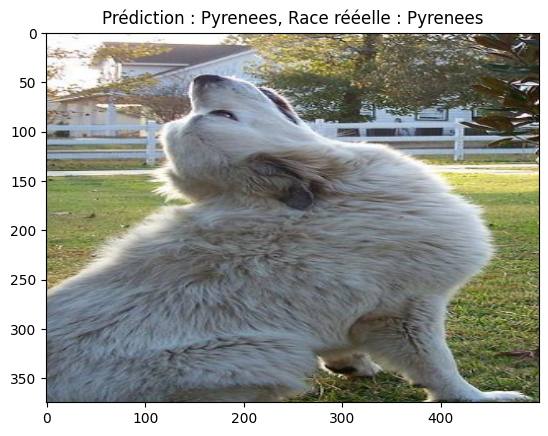

In [57]:
predictions = model_transf.predict(X_test)

predicted_class = np.argmax(predictions[img_choisie])
true_class = np.argmax(Y_test_encoded[img_choisie])
plt.imshow(X_test[img_choisie])
plt.title(f"Prédiction : {encoder.categories_[0][predicted_class]}, Race rééelle : {encoder.categories_[0][true_class]}")
plt.show()

Les courbes d'apprentissage :

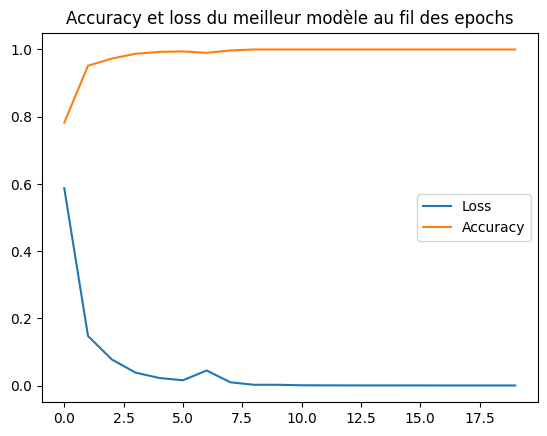

In [58]:
plt.plot(history_m_transf.history["loss"], label = "Loss")
plt.plot(history_m_transf.history["accuracy"],label = "Accuracy")
plt.title("Accuracy et loss du meilleur modèle au fil des epochs")
plt.legend()
plt.show()

On remarque un apprentissage très rapide et très bon sur les données d'entrainement, de plus le modèle est fiable sur les données de validation comme nous avons pu le voir précédemment.

Ce résultat nous démontre également que les poids d'apprentissage d'origine du modèle de base sont bons et on été potentiellement entrainées sur des données similaires.